# Lab 2: Image Enhancement

Adele Younis (20944650) and Meg Paulson (21038856)

**Introduction**

...

In [ ]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import skimage.util
import scipy.ndimage as ndimage
from scipy import signal
from skimage.color import rgb2gray
from skimage.io import imread
import numpy as np


plt.gray()
lena= imread('lena.tiff')
cameraman = imread('cameraman.tif').astype(np.float64)/255


def gaussian_filter(n_rows, n_cols, stdv):
    """
    Returns a 2d Gaussian image filter.
    """
    g_r = signal.windows.gaussian(n_rows, stdv)
    g_c = signal.windows.gaussian(n_cols, stdv)

    G = np.outer(g_r, g_c)

    return G/np.sum(G)

def PSNR(f,g):
    return 10*np.log10(1.0/ np.mean(np.square(f-g)))


<Figure size 640x480 with 0 Axes>

**2. Discrete Convolution for Image Processing**

In [ ]:
# Prepare Lena Image
lena = rgb2gray(lena)

# impulse functions
h1 = (1/6)*np.ones((1,6)) # horizontal averaging filter
h2 = h1.T # vertical averaging filter (transpose of h1 to make it vertical)
h3 = np.array([[-1, 1]]) # edge detection filter

# convolve with impulse functions
lena_h1 = signal.convolve2d(lena, h1, boundary='symm')
lena_h2 = signal.convolve2d(lena, h2, boundary='symm')
lena_h3 = signal.convolve2d(lena, h3, boundary='symm')


Text(0.5, 1.0, 'Convolved with h3')

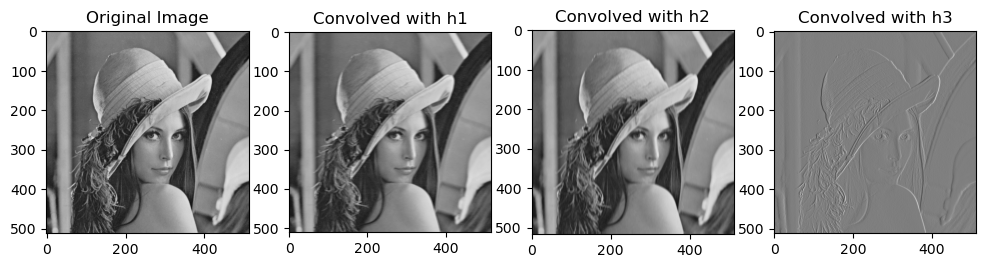

In [ ]:
# plot images
fig, axes = plt.subplots(1, 4, figsize=(12,8))

axes[0].imshow(lena, cmap='gray', vmin=0, vmax=1)
axes[0].set_title('Original Image')

axes[1].imshow(lena_h1, cmap='gray', vmin=0, vmax=1)
axes[1].set_title('Convolved with h1')  # horizontal averaging filter

axes[2].imshow(lena_h2, cmap='gray', vmin=0, vmax=1)
axes[2].set_title('Convolved with h2')  # vertical averaging filter

axes[3].imshow(lena_h3, cmap='gray') ## Come back to
axes[3].set_title('Convolved with h3')  # horizontal edge filter

**1. What did convolving the image with h1 do to the image? Looking at the impulse function, explain**
**why convolving the image with h1 yields such results.**

Visually, convolving the image with h1 (horizontal averaging) slightly increased the contrast of the image while making the vertical lines more blurry. This can especially be noticed in the woman's hair, where vertical edges in the original image are hard to see in the h1 image. Looking at the impulse function, h1, we can see that it is a 1x6 matrix - meaning that each center pixel is averaged with its five nearest horizontal neighbours. This impulse may hide rapid changes within the horizontal filter, making the output appear more blurry across the horizontal direction.


**2. What did convolving the image with h2 do to the image? Looking at the impulse function, explain**
**why convolving the image with h2 yields such results.**

Visually, convolving the image with h2 (vertical averaging) makes the image appear blurry blurred in the vertical direction, reducing the sharpness in the horizontal lines in the background of the image. When looking at the h2 impulse function, we can see that it is a 6x1 matrix, where each center pixel is averages with it's five nearest vertical neighbours. Being that h2 is the transpose of h1, it make's sense that not the output appears more blurry in the opposite direction to h1, as h2 is now poor at displaying rapic changes in the vertical direction.

**3. What did convolving the image with h3 do to the image? Looking at the impulse function, explain**
**why convolving the image with h3 yields such results.**

**4. Based on these results, what role can convolution perform in the context of image processing?**

From this exercise, we can conclude that convolution can perform various image post-processing operations depending on what kernel/filter is used. Convolution can be used to either suppress/hide (h1, h2) or enhance (h3) specific features within an image.

**3. Noise Generation**

In [ ]:
def imnoise_speckle(im, v):
    # im: input image
    # v: variance
    n = np.sqrt(v*12) * (np.random.rand(im.shape[0], im.shape[1]) - 0.5)
    return im + im * n

In [ ]:
# define toy image
toy_image = np.hstack([0.3*np.ones((200,100)), 0.7*np.ones((200,100))])

# Gaussian
toy_gaussian = skimage.util.random_noise(toy_image, mode='gaussian', mean=0, var=0.01)

# salt and pepper
toy_sp = skimage.util.random_noise(toy_image, mode='s&p', amount=0.05)

# multiplicative speckle
toy_speckle = imnoise_speckle(toy_image, 0.04)


Text(0.5, 1.0, 'Histogram of Speckle Noise')

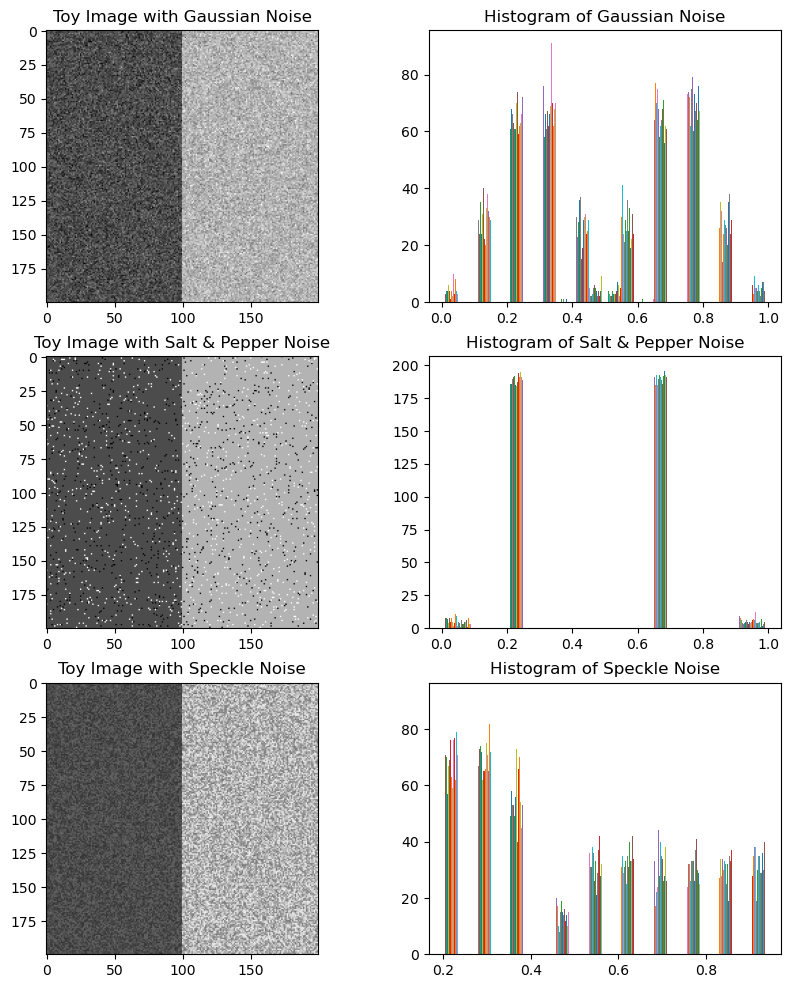

In [ ]:
# plot images and histograms
fig, axes = plt.subplots(3, 2, figsize=(10,12))
axes[0,0].imshow(toy_gaussian, vmin=0, vmax=1)
axes[0,0].set_title('Toy Image with Gaussian Noise')
axes[0,1].hist(toy_gaussian)
axes[0,1].set_title('Histogram of Gaussian Noise')

axes[1,0].imshow(toy_sp, vmin=0, vmax=1)
axes[1,0].set_title('Toy Image with Salt & Pepper Noise')
axes[1,1].hist(toy_sp)
axes[1,1].set_title('Histogram of Salt & Pepper Noise')

axes[2,0].imshow(toy_speckle, vmin=0,   vmax=1)
axes[2,0].set_title('Toy Image with Speckle Noise')
axes[2,1].hist(toy_speckle)
axes[2,1].set_title('Histogram of Speckle Noise')

***5. Describe each of the histograms in the context of the corresponding noise models. Why do they appear that way?***

The Gaussian noise histogram has the general shape of two gaussian curves joint together, where one curve peaks at around 0.3, and the other peaks at around 0.7. The two curves appear about the same in height and width about the peaks, indicating that both halves of the image were perserved well. This corresponds with the image and gaussian model as the noise is smoothed with a normal distribution. Since the gaussian noise model has a mean of 0, we are allowing for the pixels to increase or decrease in intenisty around the original pixel value. The gaussian model histogram appears very symmetrical, indicating that difference in original pixel values do not affect the amount of noise added.

The Salt and Pepper noise histogram has only 4 points in the histogram, with peaks at 0.3 and 0.7, and smaller artifcats around 0 (pepper) and 1 (salt). The histogram alligns well with what we expected from the salt and pepper model, as about 5% of the pixels fall within the extreme 0 and 1 values, while the majority of the image is still consistent with the original image. Similar to the gaussian model, the salt and pepper histogram is noticeably very symmetrical, indicating that the noise level is independant of pixel intensity.

The speckle noise histogram is the only one that does not look relatively the same between 0.3 and 0.7. The speckle noise histogram indicates that there are more lower intensity (<0.3) pixels, and less higher intensity (0.3>). This aligns with what we know of multiplicative noise models, where the noise level scales with the signal intensity. Since the right half of the image is brighter, it experiences more noise than the left side. This causes asymmetry in the histogram of the speckled image.

***6. Are there visual differences between the noise contaminated images? What are they? Why?***

Yes, the visual difference can be especially noticed in the salt & pepper image in comparison to the other two. The salt and pepper noise appears more random, as the added noise is independant of the half of the image it is in. For the guassian and speckle images, the images seem grainy and rough. For the guassian image the graininess is consistent across both halves of the image, as the noise magnitude is independant of the pixel values. However, the speckled image noise is more noticable in the right half, as the brighter intensity accounts for more noise.

***7. In the speckle noise case, what is the underlying distribution used? Can you tell from the histogram? How?***

The underlying distribution appears uniform about the variance across all pixel values when looking at the histogram. The distribution of pixels around 0.3 and 0.7 appears to be spread evenly, rather than forming bell-curves or sharp spikes.

***8. In the speckle noise case, you will notice that the peaks of the histogram are no longer of the same***
***height as they were in the original image. Also, the spread around each of the peaks is also different from each other. Why? ***
The speckle noise image does not have the same peaks as seen in the other two histograms because it is multiplicative, and not additive. in Multiplicative models, the noise magnitude scales with the pixel intensity so larger signals have larger noise magnitudes. In our other two additive models, the noise magnitude is independant of the pixel intensity, indicating that the noise amplitude is constant across all intensities.

**4. Noise Reduction in the Spatial Domain**

PSNR:  26.979358809069353


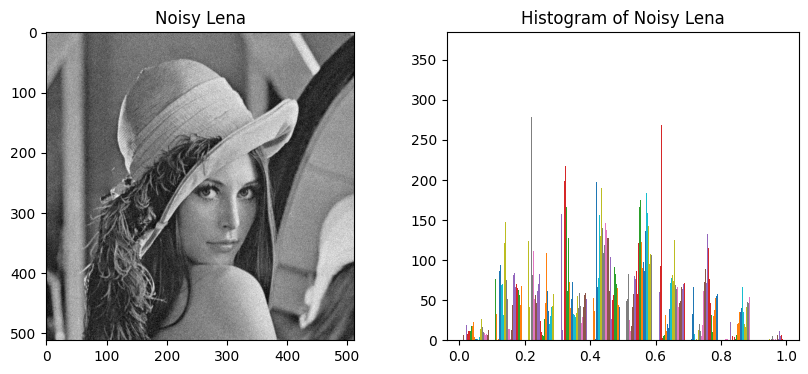

In [ ]:
# Prepare Lena image
lena = imread('lena.tiff').astype(np.float64)/255
lena = rgb2gray(lena)

# add zero-mean gaussian noise
noisy_lena = skimage.util.random_noise(lena, mode='gaussian', mean=0, var=0.002)

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].imshow(noisy_lena, vmin=0, vmax=1)
axes[0].set_title('Noisy Lena')
axes[1].hist(noisy_lena)
axes[1].set_title('Histogram of Noisy Lena')

psnr = PSNR(lena, noisy_lena)
print("PSNR: ", psnr)


Text(0.5, 1.0, '3x3 Averaging kernel')

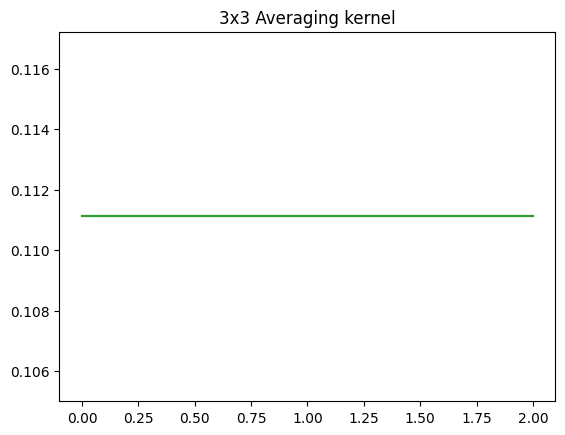

In [ ]:
# 3x3 averaging kernel
avg_kernel_3 = np.ones((3,3))/(3.0*3.0)

plt.plot(avg_kernel_3)
plt.title("3x3 Averaging kernel")


PSNR:  31.596639421859706


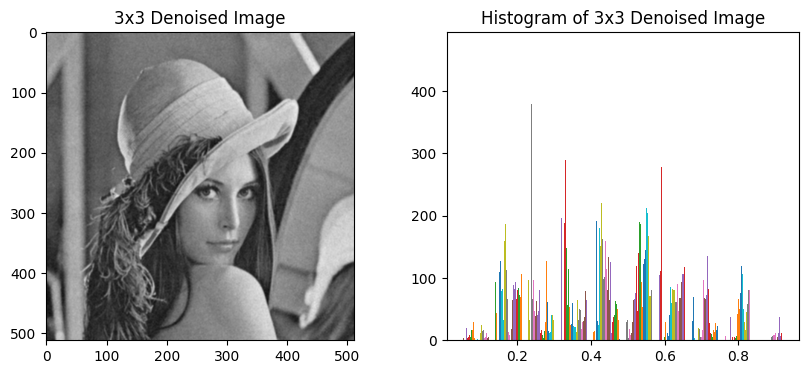

In [ ]:
# convolve noisy image with filter
denoised_3 = ndimage.convolve(noisy_lena, avg_kernel_3)

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].imshow(denoised_3, vmin=0, vmax=1)
axes[0].set_title('3x3 Denoised Image')
axes[1].hist(denoised_3)
axes[1].set_title('Histogram of 3x3 Denoised Image')

psnr = PSNR(lena, denoised_3)
print("PSNR: ", psnr)

***9. Compare the visual difference between the noisy image and the denoised image. How well did it
work? Why? Did the PSNR decrease?***

The denoised image appears mildly blurred compared to the noisy image. The operation did not seem to work well, as the denoised image still seems to contain visible Gaussian noise, just with less intensity. This is because the averaging filter equally considers the central kernel pixel's neighboring values (including noise). This results in an image that loses important features, and has slightly lower noise intensity as the values get "spread" across other pixels. The PSNR increased, indicating that the image similarity did improve when compared with the noisy image.

Text(0.5, 1.0, 'Histogram of Noisy Image')

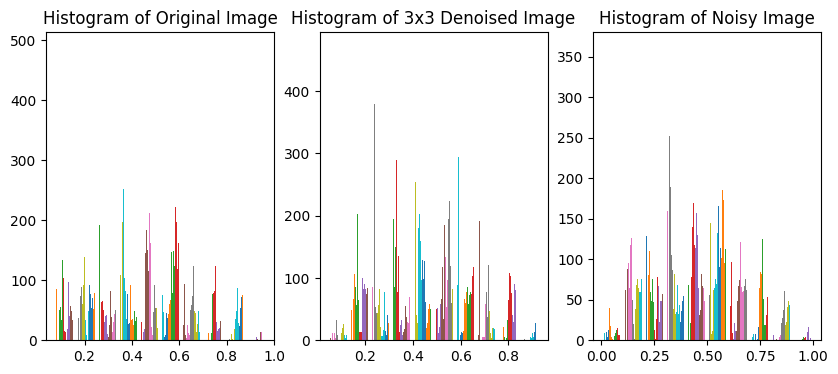

In [ ]:
# compare histograms
fig, axes = plt.subplots(1, 3, figsize=(10,4))
axes[0].hist(lena)
axes[0].set_title('Histogram of Original Image')
axes[1].hist(denoised_3)
axes[1].set_title('Histogram of 3x3 Denoised Image')
axes[2].hist(noisy_lena)
axes[2].set_title('Histogram of Noisy Image')

***10. Compare the histograms of the noise-free, noisy, and denoised images. What happened? Why?***

In the process of adding noise to the image, the distribution of pixels changed to include more intermediate gray level values, rescaling the histogrm dramatically. The denoised image retains about the same distribution of pixels as the original, but has higher peaks at some medium grey levels. The lowest intensities have also been lost in the denoised image. This happened because the act of averaging removes extreme values, resulting in a pixel distribution that is closer to the mean of the image, with more moderate intensities.

***11. Based on visual quality of the denoised image, what are the benefits and drawbacks associated with
the average filter?***

Visually, the benefits of the average filter is its ability to remove some elements of noise, without creating new image artifacts, or dramatically destroying image content. The drawback of this filter is that the image loses sharpness, and noise is still generally present.

PSNR:  27.07296923540178


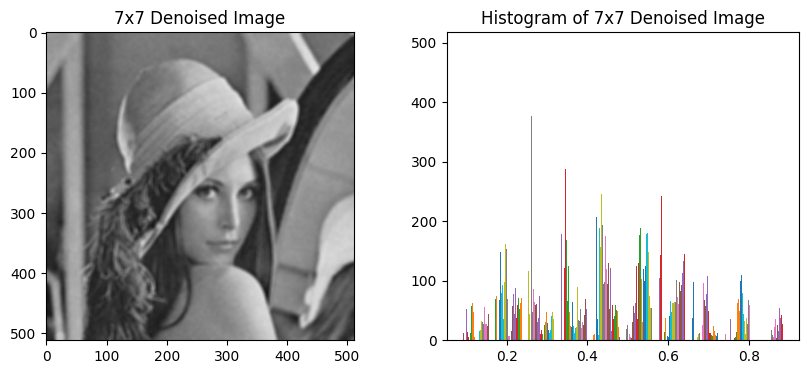

In [ ]:
# create 7x7 averaging kernel
avg_kernel_7 = np.ones((7,7))/(7.0*7.0)
# convolve noisy image with filter
denoised_7 = ndimage.convolve(noisy_lena, avg_kernel_7)

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].imshow(denoised_7, vmin=0, vmax=1)
axes[0].set_title('7x7 Denoised Image')
axes[1].hist(denoised_7)
axes[1].set_title('Histogram of 7x7 Denoised Image')

psnr = PSNR(lena, denoised_7)
print("PSNR: ", psnr)


***12. Compare the visual difference between the denoised image from the 7×7 filtering kernel and the
denoised image from the 3×3 filtering kernel. Are there any differences? Why? Did the PSNR
decrease? Why?***

The denoised image from the 7x7 filtering kernel appears much blurrier than the one produced with the 3x3 kernel, but has less obvious noise. The 7x7 filter is using a larger neighborhood of pixels, so the final average for the central pixel will include image content that's from further pixel locations, effectively blurring the image. The PSNR is almost the same as the value calculated from the original and noisy image. This again is because the average filter includes pixels far from the central location in the kernel, creating an image that has less noise, but is still dissimilar from the original.

***13. Compare the histograms of the two denoised images. What are the differences? Why?***

The histograms are very similar, but the 7x7 denoised histogram seems to have slightly more intermediate grey pixels. This is because as more pixels are used to calculating the average, the result will approach the mean of the image, which would be an intermediate grey level.

***14. Based on visual quality of the denoised image, what are the benefits and drawbacks associated with
using a larger window size?***

The benefit of using the larger window size is the increased removal of noise, but the major drawback is the loss of image features like edges and fine details.

Text(0.5, 1.0, '7x7 Gaussian Filter')

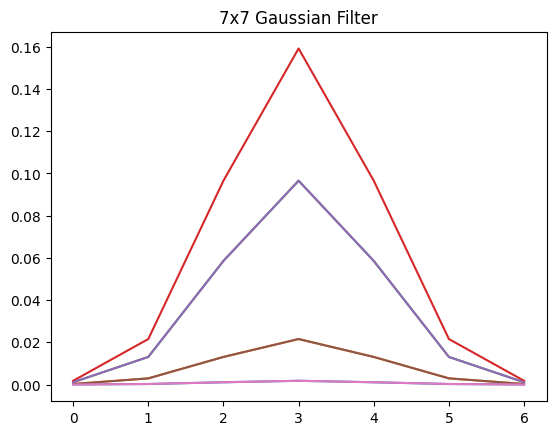

In [ ]:
# create 7x7 gaussian filter
gauss_7 = gaussian_filter(7, 7, 1)
plt.figure()
plt.plot(gauss_7)
plt.title("7x7 Gaussian Filter")


PSNR:  31.602850344217927


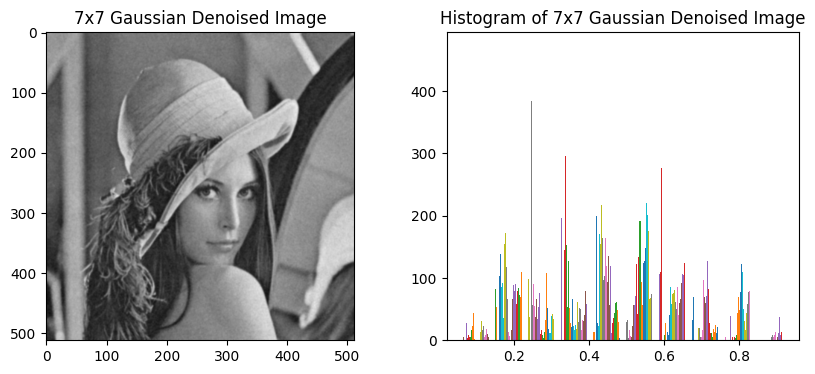

In [ ]:
# convolve noisy image with filter
denoised_g = ndimage.convolve(noisy_lena, gauss_7)

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].imshow(denoised_g, vmin=0, vmax=1)
axes[0].set_title('7x7 Gaussian Denoised Image')
axes[1].hist(denoised_g)
axes[1].set_title('Histogram of 7x7 Gaussian Denoised Image')

psnr = PSNR(lena, denoised_g)
print("PSNR: ", psnr)


***15. Compare the visual difference between the denoised image from the Gaussian filtering kernel and the
denoised images from the averaging filter kernels. Are there any differences? Why? Did the PSNR
decrease? Why?***

The denoised image from the Gaussian kernel appears to have similar noise elimination to the 3x3 averaging kernel result, but is slightly less blurry. This is because the Gaussian filter produces a weighted average of neigboring pixels, so features like edges that are closer to the central pixel will be preserved. The PSNR increased for a similar reason, as the weighted average ensures that the closer a pixel is to the central kernel pixel, the more it should matter in the final value. This creates greater similarity between the original and denoised image.


Text(0.5, 1.0, '7x7 Denoised Image')

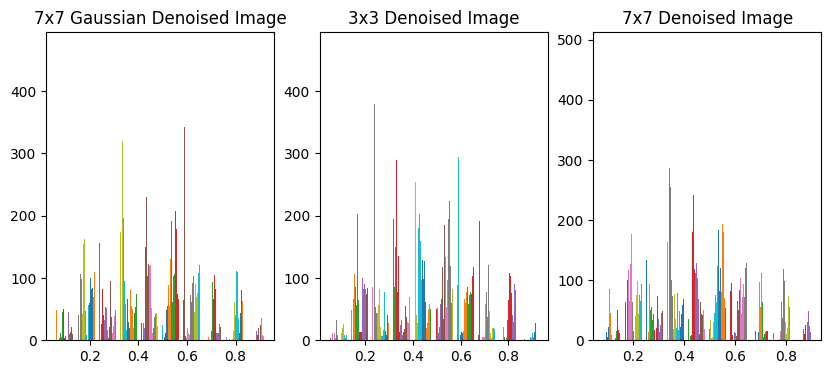

In [ ]:
# compare histograms
fig, axes = plt.subplots(1, 3, figsize=(10,4))
axes[0].hist(denoised_g)
axes[0].set_title('7x7 Gaussian Denoised Image')
axes[1].hist(denoised_3)
axes[1].set_title('3x3 Denoised Image')
axes[2].hist(denoised_7)
axes[2].set_title('7x7 Denoised Image')

***16. Compare the histograms of the denoised image using the Gaussian filtering kernel and the denoised
images from the averaging filter kernels. What are the differences? Why?***

The histogram from the Gaussian kernel seems most similar to the shape of the histogram produced by the 3x3 averaging kernel, but with slightly lower intermediate grey levels that are mostly equal, and more of the highest/lowest grey levels. This is because the Gaussian filter gently blends the noisy intensities into neighboring pixels, not as agressively as the smaller averaging filter. The histogram from the 7x7 averaging kernel seems to have a majority of moderate-intensity pixels, as it more agressively blends intensities across the whole image due to the larger window size.

***17. Based on visual quality of the denoised image, what are the benefits and drawbacks associated with
using a Gaussian kernel as opposed to an averaging kernel?***

The benefit of using a Gaussian kernel over an averaging kernel is that the result has fewer blurred edges. Visually, there doesn't seem to be a drawback to using the Gaussian kernel over the averaging kernel in this instance.

PSNR s&p:  18.37030581029652
PSNR Gaussian:  27.302941226514683
PSNR Averaging:  26.137154852529356


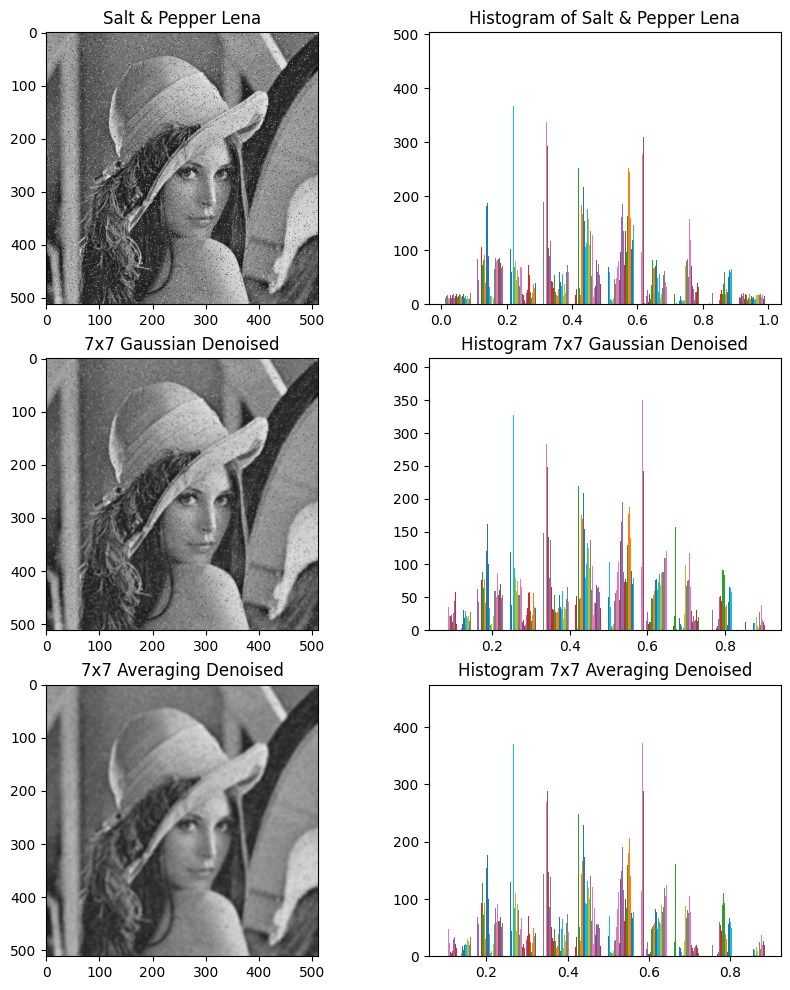

In [ ]:
# apply salt and pepper noise to Lena image
lena_sp = skimage.util.random_noise(lena, mode='s&p', amount=0.05)
# convolve noisy image with 7x7 gaussian and averaging filters
denoised_sp_g = ndimage.convolve(lena_sp, gauss_7)
denoised_sp_7 = ndimage.convolve(lena_sp, avg_kernel_7)

fig, axes = plt.subplots(3, 2, figsize=(10,12))
axes[0,0].imshow(lena_sp, vmin=0, vmax=1)
axes[0,0].set_title('Salt & Pepper Lena')
axes[0,1].hist(lena_sp)
axes[0,1].set_title('Histogram of Salt & Pepper Lena')

axes[1,0].imshow(denoised_sp_g, vmin=0, vmax=1)
axes[1,0].set_title('7x7 Gaussian Denoised')
axes[1,1].hist(denoised_sp_g)
axes[1,1].set_title('Histogram 7x7 Gaussian Denoised')

axes[2,0].imshow(denoised_sp_7, vmin=0,   vmax=1)
axes[2,0].set_title('7x7 Averaging Denoised')
axes[2,1].hist(denoised_sp_7)
axes[2,1].set_title('Histogram 7x7 Averaging Denoised')

psnr_sp = PSNR(lena, lena_sp)
psnr_g = PSNR(lena, denoised_sp_g)
psnr_7 = PSNR(lena, denoised_sp_7)
print("PSNR s&p: ", psnr_sp)
print("PSNR Gaussian: ", psnr_g)
print("PSNR Averaging: ", psnr_7)


***18. How does the averaging filter and Gaussian filtering methods perform on the noisy image in terms of
noise reduction? Explain in terms of visual quality as well as PSNR. Why do we get such results?***

The Gaussian filter seems to struggle on this image, with much of the noise still remaining, though the PSNR does increase. The averaging filter removes more of the noise, but struggles from the same blurriness, resulting in a lower PSNR. The poor performance between both filters is because they use averaging, which is unable to reject the very high and low intensity outliers from the salt & pepper noise. This causes the noise to spread to neighboring pixels.

***19. Compare the histograms of the denoised images with that of the noisy image. What characteristics
are present in all of the histograms? Why?***

All of the histograms share the same underlying distribution as the original image, with peaks around 0.6, and a small number of very high intensity pixels. This is because even though the noise reduction methods redistributed some of these values into neighboring grey levels, there is still an emphasis on these extreme values.

PSNR median:  34.2407976222896


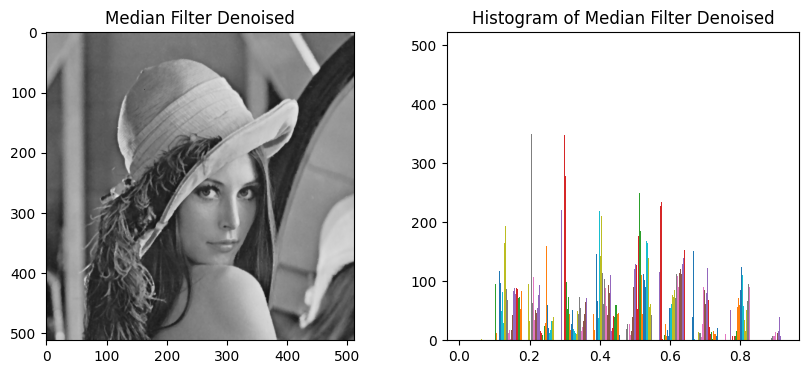

In [ ]:
# apply 3x3 median filter
denoised_sp_med = ndimage.median_filter(lena_sp, size=3)

fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].imshow(denoised_sp_med, vmin=0, vmax=1)
axes[0].set_title('Median Filter Denoised')
axes[1].hist(denoised_sp_med)
axes[1].set_title('Histogram of Median Filter Denoised')

psnr_med = PSNR(lena, denoised_sp_med)
print("PSNR median: ", psnr_med)

***20. How does the denoised image produced using the median filter compare with the denoised images
produced using averaging filter (7x7) and Gaussian filtering methods? Explain in terms of visual
quality as well as PSNR. Why do we get such results with median filter when compared to the other
spatial filtering methods?***

The denoised image produced using the median filter is the best by far in terms of visual quality. Edge sharpness is maintained, and smooth areas show no evidence of the original noise. The PSNR is also the highest between all filters, indicating that the denoised image is most similar to the original. The improved result is because median filters tend to handle impulse noise (like salt & pepper noise) very well. They replace the central kernel pixel with the median of its neighbors, which means they are able to avoid influence from outliers like the high and low intensity noise pixels present, and will not blur the final result.
